# Height Distribution of 2022 FIVB Volleyball Women's World Championship Players

I have been recently following two major volleyball events: the men's and women's 2022 FIVB Volleyball World Championship.

I got interested in the different physical profile of the teams. The biotype of the players of the Japanese Women's team seemed completely different from the others, nevertheless they are quite successful. Interested in taking a deeper look into it and looking at how the height correlates with how successful a volleyball team is (and if there is any correlation at all), I decided to check the numbers by myself.

|![Photo of a volleyball with one hand positioned to attack and a pair of hands getting read to block](images/UAB-Volleyball-2012_block-high-ball_Steven-Ross_flickr_CC-BY-NC-2.0_cropped.jpg)|
|:--:| 
| by Steven Ross via [flickr](https://www.flickr.com/photos/spross/8151767919/in/album-72157631921168096/) - [CC-BY-NC-2.0](https://creativecommons.org/licenses/by-nc/2.0/), cropped |

Before moving on, some considerations:

- You need to know a bit of volleyball to understand part of the discussion, but just the basics such as the different positions and the category of points (I'm far from knowing more than that myself). So, proceed at your own risk if you are a complete noob! On the other way, if you are a big fan of volleyball everything I say may be too obvious, so take care also.
- Hundreds, if not thousands, of parameters and statistics are not considered in this analysis since they were not easily available.
- Finally, this is a limited correlation analysis done for fun. Even if I try to have some method and scientific reasoning, my conclusions should be taken with a grain of salt. Ask a real data analyst that knows volleyball for a serious study.

# Getting the data

Teams and players info are harvested from [FIVB website](https://en.volleyballworld.com/volleyball/competitions/women-worldchampionship-2022/) on November/2022 using the python binding of [Selenium](https://www.selenium.dev/).

Before moving on, lets load all the modules necessary for the analysis and set some plot and display properties: 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# allow display in latex and markdown from code
from IPython.display import display, Markdown, Latex
# produce vector inline graphics
import matplotlib_inline
# If you are using the Firefox browser, SVGs on GitHub may not render.
matplotlib_inline.backend_inline.set_matplotlib_formats('svg','png')

# reduce pandas displa precision
pd.set_option('display.precision',3)

# resetting some matplotlib parameters to my sauce
plt.rcParams['figure.figsize'] = (9.0,4.0)
plt.rcParams['figure.constrained_layout.use'] = True

# not all boxplot properties can be set using rcParams, so just
# defining it directly with the following dict
plt.rcParams['boxplot.patchartist'] = True # fill with color
boxplot_props = dict(
    boxprops={'color':'k','facecolor':'lightskyblue'},
    medianprops={'color':'k',},
    capprops={'color':'k',},
    whiskerprops={'color':'k',},
)
# text that is re-used often to indicate the source of the data into figures
text_source = \
    'Data source: en.volleyballworld.com/volleyball/competitions/women-worldchampionship-2022'
text_source_props = dict(fontsize=8,color='dimgray',)

# dict with annotation properties re-used several times
annotation_props=dict(
    size=8,va='center',
    arrowprops=dict(
        fc='w',color='k',arrowstyle='->',
        connectionstyle='arc3,rad=0.2',
    ),
)

Run scraping script if files are not available - takes about 10 minutes - and reading the generated CSV documents. The files are already available if you cloned the [repository where this notebook is originally posted](https://github.com/wjgsp-com/volleyball-world-championship-height).

In [2]:
data_folder = './data'
if not all (os.path.isfile(f'{data_folder}/{f}.csv') for f in ('players','teams')):
    import subprocess
    subprocess.run('python get_data.py',shell=True)
else:
    print('Data already available')

Data already available


In [3]:
file_path = os.path.join(data_folder,'players.csv')
data_players = pd.read_csv(file_path,index_col='player_id')
file_path = os.path.join(data_folder,'teams.csv')
data_countries = pd.read_csv(file_path,index_col='team_name')

# rename USA
data_countries = data_countries.rename(index={'USA':'United States'})

# create a column with abbreviation of the country
# to be used on plots
country_abbr = data_countries.loc[data_countries.index]['team_abbreviation']
abbreviation_map = dict(
    zip(data_countries.index,data_countries['team_abbreviation'])
)
data_players['country'] = data_players['nationality'].map(abbreviation_map)

The database has 336 players from 24 countries. Players' data include the name, number, height, weight, average and total number of scored points per category (attack, block and serve) and the corresponding success rates and the position (Setter, Outside Hitter, Opposite spiker, Middle blocker and Libero).

Position of Gabriela Orvosova, from Czech Republic, is listed as "Universal". Not knowing what that is and not being able to find any more info on that matter, I have manually overwritten that by "Opposite spiker", as stated on her profile in the [European Volleyball Confederation (CEV) website](https://www.cev.eu/national-team/european-league/european-golden-league/women/team/12119-czech-republic/player/74064-orvosova-gabriela) (accessed on November/2022).

## My initial question

To check the height influence, first let's consider the average and median height of the players on overall and by team:

In [4]:
data_avg = data_players.groupby('nationality').mean()
data_median = data_players.groupby('nationality').median()

data_countries['avg_height'] = data_avg['height'][data_countries.index]
data_countries['median_height'] = data_median['height'][data_countries.index]

print('Average player height: {:.3f}'.format(data_players['height'].mean()))
print('Median player height:',data_players['height'].median())

data_countries[['avg_height','median_height']].sort_values(by=['avg_height'])

Average player height: 182.780
Median player height: 184.0


,avg_height,median_height
team_name,,
Thailand,175.571,178.0
Japan,175.714,176.5
Kenya,177.786,180.0
Korea,177.857,180.5
Kazakhstan,178.143,179.5
Colombia,180.000,181.5
Argentina,180.357,181.0
Czech Republic,182.214,184.0
Cameroon,182.929,183.5


The Japanese team is not the shortest in terms of average but is not very far from it: with 175.71 cm (5'9") the average Japanese teammate is only 2 millimiters taller than the average Thai player (175.57 cm). For the median, the nipponic team is by far the shortest, with 176.5 cm.

On the opposite side of the scale, the Chinese players are the tallest for both metrics: average of 188.82 cm (6'2") and median of 190.5 cm (6'3"). The overall average player is about 183 cm (6') tall.

The boxplot of all the players' height by nationality illustrates well the offset that exists between the participating teams:

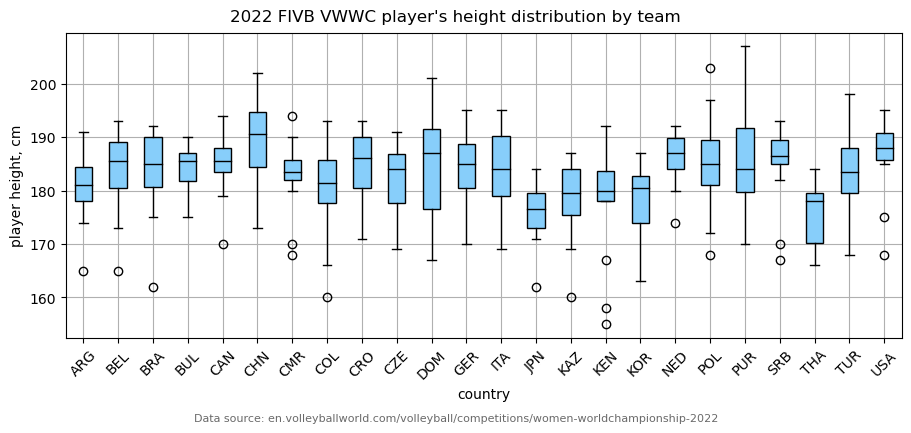

In [5]:
ax = data_players.boxplot(
    column=['height'],by=['country'],
    rot=45,grid=True,
    **boxplot_props,
)
ax.set_ylabel('player height, cm')
ax.set_xlabel('country')
ax.set_title('')
fig = ax.get_figure()
fig.suptitle("2022 FIVB VWWC player's height distribution by team")
fig.text(0.5,-0.02,f'{text_source}',va='top',ha='center',**text_source_props);

### Final standing

To check if there is any relationship between the players' height and their teams'  performance, lets plot how the median height evolves with the ranking at the end of the competition:

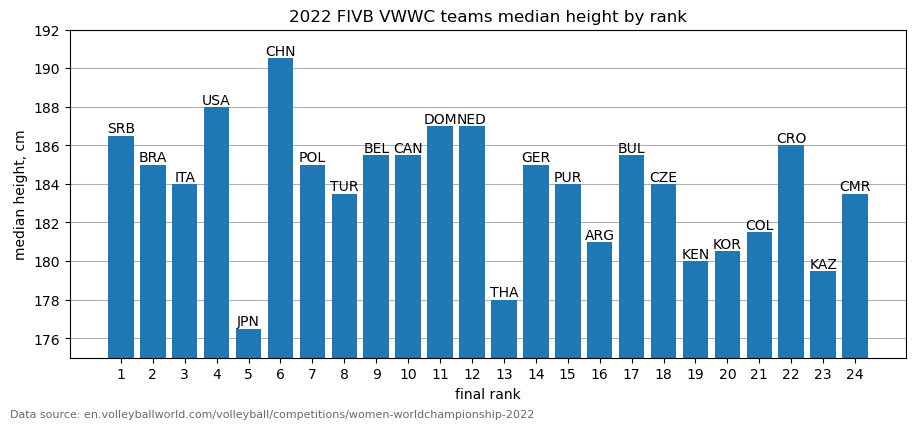

In [6]:
fig, ax = plt.subplots(1,1)
bars = ax.bar(
    data_countries['rank'],
    data_countries['median_height'],
)
ax.bar_label(bars,labels=data_countries['team_abbreviation']);
ax.set_ylabel('median height, cm')
ax.set_ylim([175,192])
ax.set_xlabel('final rank')
ax.set_xticks(range(1,25,))
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_title('2022 FIVB VWWC teams median height by rank');
fig.text(0.0,-0.03,f'{text_source}',ha='left',**text_source_props);


A first visual analysis indicates that there is only a small and noisy decreasing relationship between the final rank and the median height, even though the presence of a clear staircase on the podium (Serbians taller than Brazilians, Brazilians taller than Italians). Funnily enough the tallest team (China) is right next to the shortest one (Japan).

We can go a bit further by looking at the correlation and determination coefficients:

In [7]:
# need scipy for Spearman's method
r_pearson = data_countries['rank'].corr(
    data_countries['median_height'])
r_spearman = data_countries['rank'].corr(
    data_countries['median_height'], method='spearman')
r_square = r_pearson**2

display(Latex(f'$r$ = {r_pearson:.4f}'))
display(Latex(f'$\\rho$ = {r_spearman:.4f}'))
display(Latex(f'$R^2$ = {r_square:.4f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The small values of the coefficients reinforce the conclusion of the visual analysis, confirming that the correlation between the height and the final standing is poor. Such result is expected considering a relatively short competition (champion participate in only 12 matches) of a game that is played point-by-point and can be decided by small gestures such as an accidental net or ball touch.

To move forward we evaluate the relationship between the height and the players' individual performance during the championship.

### Individual performance

Before going to the comparison of the height, we check the influence of the player position into the number of scored points:

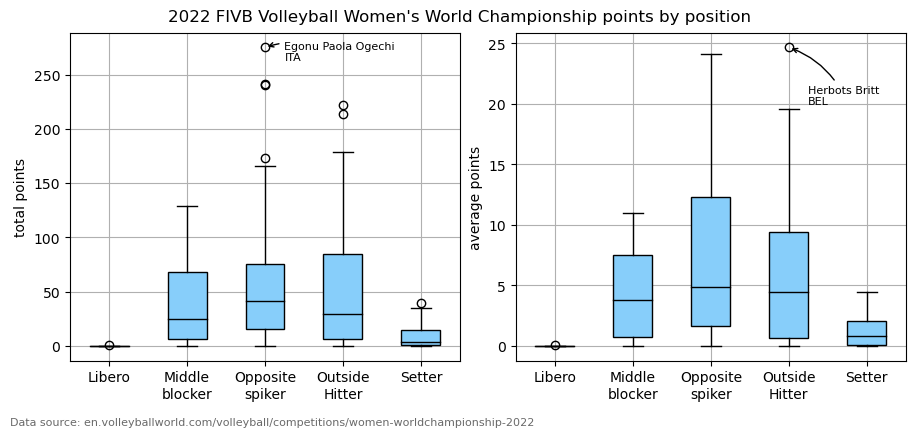

In [8]:
fig, axs = plt.subplots(1,2)

for ax, var in zip(axs,['total_points','total_points_average_by_match']):
    data_players.boxplot(
        column=var,by=['position'],
        rot=0,grid=True,
        **boxplot_props,
        ax=ax
    )
    ax.set_title('')
    ax.set_xlabel('')
    # rename labels to avoid rotating
    list_positions = [l.get_text() for l in ax.get_xticklabels()]
    new_labels = [l.replace(' ','\n') for l in list_positions]
    ax.set_xticklabels(new_labels)
    # pointing to the player with the best performance
    index_best = data_players[var].idxmax()
    best_player = data_players.loc[index_best]
    player_x = list_positions.index(best_player['position'])
    player_y = best_player[var]
    ax.annotate(
        f"{best_player['name']}\n{best_player['country']}",
        xy=(player_x+1,player_y),
        xytext=(player_x+1.25,player_y-4),
        ha='left',
        **annotation_props,
        )
    
axs[0].set_ylabel('total points')
axs[1].set_ylabel('average points')

fig.suptitle("2022 FIVB Volleyball Women's World Championship points by position");
fig.text(0.0,-0.05,f'{text_source}',ha='left',**text_source_props);

The nature of the different positions is quite clear: while liberos scored no points at all (they are not allowed to block, serve and attack the ball), opposite and hitters are the most effective pointwise. Observed tendency justifies removing liberos on further analysis since they score no points and are way shorter - I discuss that later. Also, since some players had more chances to score than others with the knockout phase, only the average points per match are considered.

On a side note, we can highlight the amazing performances of Paola Egonu (Italy) with a total of 275 points and Britt Herbots (Belgium) with an average of 24.67 points per match!

Such as the players position, it is prudent to consider the different nature of points - from attack, block or serve - in following analysis:

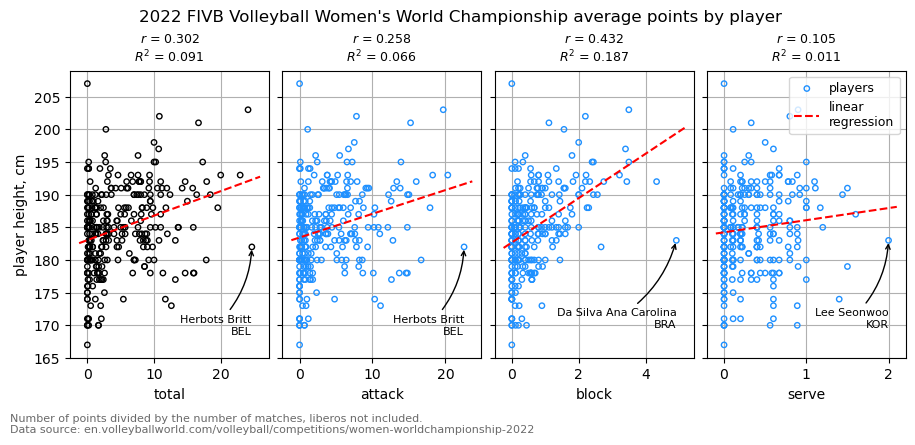

In [9]:
# removing liberos
filtered_data_players = data_players[
    data_players['position'] != 'Libero' ].copy(deep=True)
players_heights = filtered_data_players['height']

points_types = dict(
    total=dict(col='total_points_average_by_match',color='k'),
    attack=dict(col='attack_points_avg_points',color='dodgerblue'),
    block=dict(col='block_points_avg_points',color='dodgerblue'),
    serve=dict(col='serve_points_avg_points',color='dodgerblue'),
    )

fig, axs = plt.subplots(1,len(points_types),sharey=True,)
best_players = {}
for typ, ax in zip(points_types,axs):
    point_dict = points_types[typ]
    players_points = filtered_data_players[point_dict['col']]
    ax.scatter(
        players_points,players_heights,
        marker='o',s=15.,color='none',
        edgecolors=point_dict['color'],linewidths=1.,
        label='players',
    )
    ax.grid()
    
    # add regression line
    orig_ylim = ax.get_ylim()
    a, b = np.polyfit(players_points,players_heights,1)
    x_lim = np.array(ax.get_xlim())
    ax.plot(x_lim,a*x_lim + b,'--r',
            label='linear\nregression'
    )
    r_pearson = players_points.corr(players_heights)
    ax.set_title(
        f'$r$ = {r_pearson:0.3f}\n'
        f'$R^2$ = {r_pearson**2:0.3f}',
        fontsize=9,
    )
    ax.set_ylim(orig_ylim)
    ax.set_axisbelow(True)
    ax.set_xlabel(typ)
    
    # pointing to the player with the best performance
    index_best = players_points.idxmax()
    best_players[typ] = filtered_data_players.loc[index_best]
    best_player_h = best_players[typ]['height']
    best_player_p = best_players[typ][point_dict['col']]
    ax.annotate(
        f"{best_players[typ]['name']}\n{best_players[typ]['country']}",
        xy=(best_player_p,best_player_h),
        xytext=(best_player_p,best_player_h-12),
        ha='right',
        **annotation_props,
        )

axs[0].set_ylabel('player height, cm')
axs[-1].legend(loc='best',prop={'size':9});
fig.suptitle(    "2022 FIVB Volleyball Women's World Championship average points by player")
fig.text(
    0,-0.02,
    'Number of points divided by the number of matches, liberos not included.'
    f'\n{text_source}',
    va='top',**text_source_props
);


For all categories of point there is a small but noticeable trend: the taller you are, more points were scored on general. This is especially pronounced for block points, as expected. Similar results are obtained when the success rate of attack, block and serve are analyzed (not shown).

However, the large dispersion around the regression lines and the small correlation and determination coefficients ($R^2 < 0.2$) indicate that the relationship is quite thin. The heights of the best scorers per category, highlighted in the graphs, reinforce this conclusion:

In [10]:
# display table with the best player by point category
pd.DataFrame.from_dict(best_players, orient='index')[['name','country','position','height']]

,name,country,position,height
total,Herbots Britt,BEL,Outside Hitter,182
attack,Herbots Britt,BEL,Outside Hitter,182
block,Da Silva Ana Carolina,BRA,Middle blocker,183
serve,Lee Seonwoo,KOR,Outside Hitter,183


All best scorers in terms of average points are actually bellow the overall median of 184 cm. Even for block points, Brazilian Ana Carolina is "only" 1.83 m. The same for Britt Herbots, the best scorer on average considering the total points, with "miserable" 1.82 m (5'11").

### Scoring profiles

An analysis of the scored points profile by team seems to also be interesting, since the height of the teammates can influence the tactics and help to further clarify how the Japanese team got so far while being the smallest.

So, we sum all the points of each player and calculate and plot the points ratios by category:

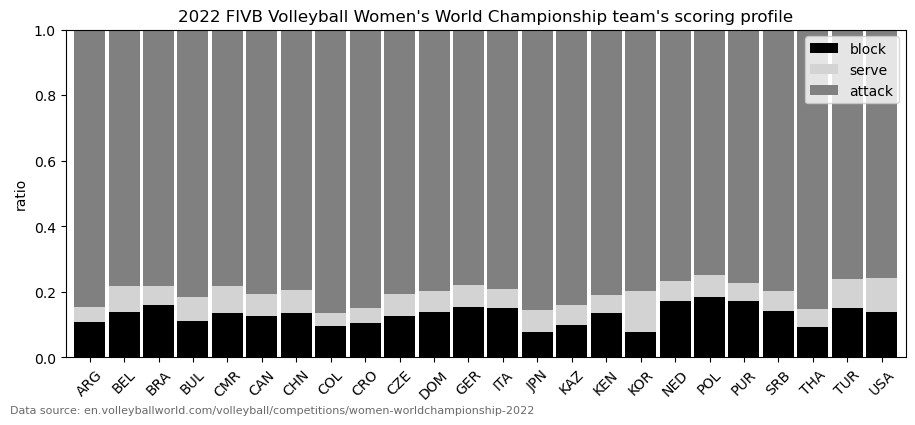

In [11]:
# calculate the ratio of points by type for each team
data_countries['total_points'] = \
   data_players.groupby('nationality')['total_points'].sum()
points_type = ['block_points','serve_points','attack_points',]
points_ratio =[]
# avoid concat to not modify dataframe in a re-run, calculate the points ratio
for typ in points_type:
    data_countries[typ] = data_players.groupby('nationality')[typ].sum()
    ratio = typ.replace('points','ratio')
    points_ratio.append(ratio)
    data_countries[ratio] = \
        data_countries[typ]/data_countries['total_points']

ax = data_countries.plot.bar(
    x='team_abbreviation',y=points_ratio,
    stacked=True,width=0.9,
    color=['k','lightgray','gray',],
    rot=45,
)
ax.set_ylim([0,1])
ax.set_ylabel('ratio')
ax.set_xlabel('')
ax.legend([t.split('_')[0] for t in points_type])
ax.set_title(
    "2022 FIVB Volleyball Women's World Championship team's scoring profile"
    )
fig = ax.get_figure()
fig.set_constrained_layout(True)
fig.text(
    0,-0.02,f'{text_source}',
    **text_source_props
);

We can see that the points are mostly from attacks (average of 80%) for all teams, but the ratios vary significantly among the nations. Japan, South Korea and Thailand, for example, perform relatively less when blocking. Let's see how the Japanese scoring profile compare to the championship average:

In [12]:
# display table with the points ratio per country
pd.DataFrame.from_dict(
    dict(
        max=data_countries[points_ratio].max(),
        mean=data_countries[points_ratio].mean(),
        min=data_countries[points_ratio].min(),
        Japan=data_countries.loc['Japan'][points_ratio],
    ),
    orient='index',
)

,block_ratio,serve_ratio,attack_ratio
max,0.185,0.126,0.865
mean,0.131,0.067,0.803
min,0.077,0.038,0.749
Japan,0.079,0.065,0.856


The Japanese team scoring ratio is close to the highest when considering the attack points and is almost the lowest for blocking, while being on average in terms of serve points.

A direct look into the evolution of scoring ratios versus the teams' median height can unravel a bit more the influence of the height into the team scoring performance:

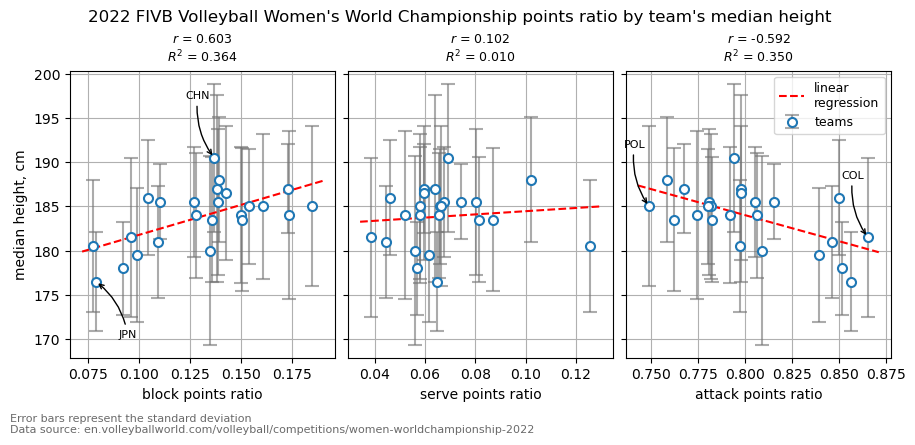

In [13]:
# get std to plot as error bars
std_height = data_players.groupby('nationality')['height'].std()

fig, axs = plt.subplots(1,len(points_ratio),sharey=True,)
for ax, rat in zip(axs,points_ratio):
    ratio = data_countries[rat]
    height = data_countries['median_height']
    
    ax.errorbar(
        ratio,height,yerr=std_height,
        linestyle='',marker='o',markerfacecolor='w',
        markeredgewidth=1.5,markersize=6.5,capsize=5.0,
        ecolor=[0.45,0.45,0.45,0.6], # transparent gray
        label='teams',
    )
    ax.grid()
    ax.set_xlabel(f'{rat.split("_")[0]} points ratio')
    ax.set_axisbelow(True)
    
    # add regression line
    orig_ylim = ax.get_ylim()
    a, b = np.polyfit(ratio,height,1)
    x_lim = np.array(ax.get_xlim())
    ax.plot(x_lim,a*x_lim + b,'--r',
            label='linear\nregression'
    )
    r_pearson = ratio.corr(height)
    ax.set_title(
        f'$r$ = {r_pearson:0.3f}\n'
        f'$R^2$ = {r_pearson**2:0.3f}',
        fontsize=9,
    )
    ax.set_ylim(orig_ylim)
    
    # pointing to the shortest team (Japan) and lowest ratio
    if rat == 'attack_ratio': idxs = [ratio.idxmin(),ratio.idxmax()]
    elif rat == 'block_ratio': idxs = [height.idxmin(),height.idxmax()]
    else: idxs =[]
    delta_y = -6
    delta_x = 0.02
    for idx in idxs:
        team_h = height[idx]
        team_r = ratio[idx]
        # "manually" placing the annotation
        if team_h > height.mean():
            delta_y = 7; delta_x = -0.002
        ax.annotate(
            f"{data_countries['team_abbreviation'][idx]}",
            xy=(team_r,team_h),
            xytext=(team_r+delta_x,team_h+delta_y),
            ha='right',
            **annotation_props,
            )

axs[0].set_ylabel('median height, cm')
axs[-1].legend(loc='best',prop={'size':9});
fig.suptitle(
    "2022 FIVB Volleyball Women's World Championship points ratio by team's median height"
    )
fig.text(
    0,-0.02,
    f'Error bars represent the standard deviation\n{text_source}',
    va='top',**text_source_props
);

There is no distinct relationship between the serve points ratio and team height, similar to the individual serve performance illustrated earlier. While correlation is small and of poor confidence due to reduced number of datapoints, only 24 teams and ratios representing a total of 52 matches, two trends are clear ($R^2 \approx 0.35$):

- the tallest teams score relatively more by blocking than short teams and vice-versa.
- the tallest teams score relatively less by attacking than short teams and vice-versa.

The Japanese team is quite representative of noted tendencies once it is simultaneously close to both extrema, as stated earlier.

## Conclusions

My original queries were if the Japanese team was effectively shorter than others and how the players' height influenced the performance. The first point was rapidly answered (yes, they were) while the second point is a bit more complicated.

The competition final ranking and the individual player's performance (average scored points) are only slightly related to the height of the players. The profile of the scored points (attack, block or serve) is, on the other hand, clearly correlated to the players median height where the shorter teams score relatively way less by blocking. As I have noticed watching the matches, but have no data to support that claim, the nipponic players, either naturally or by design, are really good at receiving the ball from adversaries and score relatively less from blocks than others.  

This analysis is very limited by only considering the scoring as a performance criterium. In a crude comparison, if you are more into football like me, it would be like measuring the goalkeeper performance by the number of scored goals. Also, it would be fundamental to check how each team lost points to their opponents as well. Finally, extend this investigation to a larger database, composed by more than one competition, would improve the quality of the study considerably.

I admit the starting premise was silly, more of an excuse to rescue some of my knowledge in statistics from the bottom drawer and exercise my skills in Pandas, Selenium and Jupyter.

My original question is already answered, but since we have a nice database available, why not move further?

## Going further...

Since we are here, we can look at the smallest and tallest players in absolute terms:

In [14]:
data_players[['name','position','nationality','height']].loc[
        [data_players['height'].idxmin(),data_players['height'].idxmax()]
].style.hide()

name,position,nationality,height
Kundu Agripina Khayesi,Libero,Kenya,155
Hernandez Alba,Middle blocker,Puerto Rico,207


As expected, the smallest player is a libero: Khayesi Kundu Agripina, from Kenya, with 1.55 m (5'1"). The tallest player is Alba Hernandez, a 2.07 meters (6'10") tall blocker from Puerto Rico. The discrepancy between liberos and blockers is quite clear when the distribution by position is plotted:

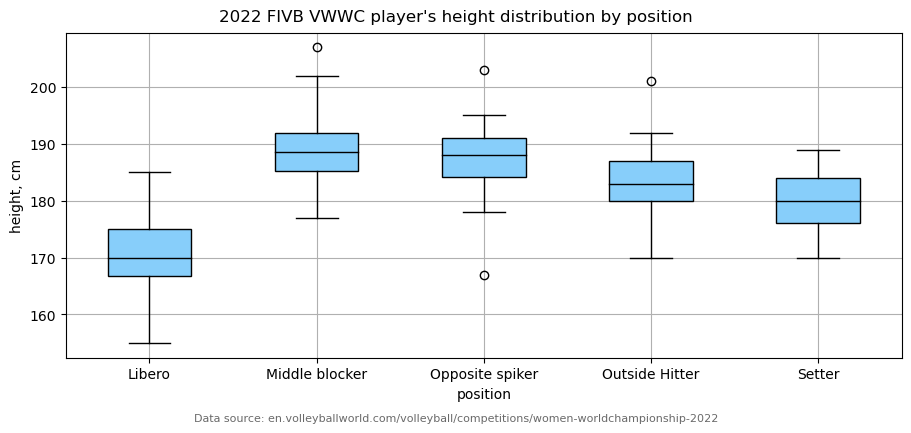

In [15]:
ax = data_players.boxplot(
    column=['height'],by=['position'],
    grid=True,
    **boxplot_props,
)
ax.set_title('')
ax.set_ylabel('height, cm')
ax.set_xlabel('position')
fig = ax.get_figure()
fig.suptitle("2022 FIVB VWWC player's height distribution by position")
fig.text(0.5,-0.02,f'{text_source}',va='top',ha='center',**text_source_props);

But how do they compare to the general population?

## Looking at the complete distribution

We may compare the height distribution of the complete dataset with the overall population.

Many aspects of human height are discussed in a very nice article by Our World in Data [[1](#refOurWorldInData)], including height distribution. For my analysis I retake their reference that discuss the global height distribution of men and women, Jelenkovic et al. (2016) [[2](#refJelenkovic)], and reproduce their disclaimer that results are not globally representative since it does not include all world regions due to data availability.

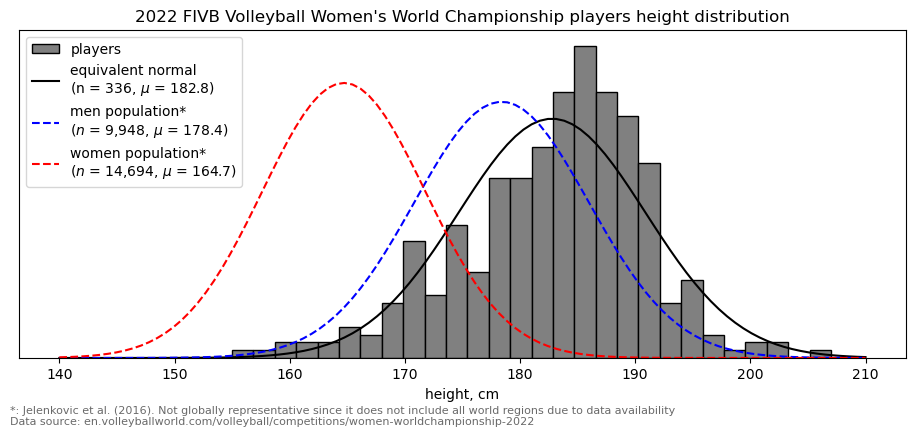

In [16]:
# function to calculate a normal distribution
n_dist = lambda x, mu, sigma: \
    np.exp(-0.5*((x - mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))
plot_normal_x = np.linspace(140,210,100)

values = data_players['height']
# corresponding normal for players
plot_normal_y = n_dist(
    plot_normal_x,np.mean(values),np.std(values)
)
# get center of bars
number_bins = len(values)//12
count, division = np.histogram(values,bins=number_bins,density=True)
centers = division[:-1] + np.diff(division)/2
bar_full_width = division[1] - division[0]

fig, ax = plt.subplots(1,1,)
ax.bar(
    x=centers,height=count,
    width=bar_full_width,
    color=[0.5,0.5,0.5],
    edgecolor=['k'],
    label=f'players',
)
ax.plot(
    plot_normal_x,plot_normal_y,
    '-',color='k',
    label='equivalent normal\n'
          f'(n = {len(values):,d}, $\mu$ = {np.mean(values):.1f})'
)

# plot the women and men "global" distribution
# Jelenkovic et al 2016 - table 1, All cohorts, data for 1980–1994
ref_data = dict(
    men={'n':9948,'mu':178.4,'sigma':7.59,'color':'b'},
    women={'n':14694,'mu':164.7,'sigma':7.07,'color':'r'},
)
for key in ref_data:
    ref = ref_data[key]
    ax.plot(
        plot_normal_x,n_dist(plot_normal_x,ref['mu'],ref['sigma']),
        '--',color=ref['color'],
        label=f'{key} population*\n'
              f'($n$ = {ref["n"]:,d}, $\mu$ = {ref["mu"]})'
    )
ax.set_title(
    "2022 FIVB Volleyball Women's World Championship players height distribution"
    )
# changing the order of legend so the bars are at the top (not default)
handles, labels = ax.get_legend_handles_labels()
labels_order = [3,0,1,2]
ax.legend(
    [handles[i] for i in labels_order],
    [labels[i] for i in labels_order],
    loc='upper left'
)

ax.set_xlabel('height, cm')
ax.get_yaxis().set_visible(False)
fig.text(
    0,0,
    '*: Jelenkovic et al. (2016). Not globally representative since it does '
    'not include all world regions due to data availability'
    f'\n{text_source}',
    va='top',
    **text_source_props
);

Players' height is pretty close to a normal distribution. One could expect the distribution not to be that close to normal considering that national teams are by far not randomly selected individuals, but several factors may be considered. For instance, the relatively diversity of the positions, as discussed earlier, the health status of all available players at the time of the event and, most importantly, their technical skills, what may not be associated with their height at all! 

Another interesting aspect is that the volleyball players are not only taller than the average women but also taller than the average men.

## References

[<a id="refOurWorldInData">1</a>] Max Roser, Cameron Appel and Hannah Ritchie (2013) - "Human Height". Published online at OurWorldInData.org. Retrieved from: [https://ourworldindata.org/human-height](https://ourworldindata.org/human-height)

[<a id="refJelenkovic">2</a>] Jelenkovic, A. et al. (2016). Genetic and environmental influences on adult human height across birth cohorts from 1886 to 1994. Elife, 5, e20320. [doi.org/10.7554/eLife.20320](https://doi.org/10.7554/eLife.20320)